# 2.1 Plotting the literature equation
##  Example 2, Part 1: pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

OIn this *Python* notebook **we will plot the integrated rate equations that were used in the paper**. Spoiler Alert: they will be revealled to be incorrect. We will then establish the correct equation.

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 


## Creating the Equations

Below is *Python* code that recreates the equation that describes absorbance vs time for the reaction. This is eq. 3 from the paper.

$$\text{Abs} = \text{Abs}_0 e^{-k_1 t}
             + \frac{\epsilon_I}{\epsilon_A}\text{Abs}_0\frac{k_1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t} \right)
             + \frac{\epsilon_P}{\epsilon_A}\text{Abs}_0\left[ 2 - e^{-k_1 t} - \frac{1}{k_2-k_1}\left(e^{-k_1 t} - e^{-k_2 t}\right) \right]$$

We will separate this equation into the components for the absorbance for each of the three species and then add them all together to get the total absorbance. This will allow us to plot the absorbance due to each species along with the combined total.

In [4]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# create math symbols for the equations
t = sym.symbols('t')     
t, k1, k2, A0 = sym.symbols('t k1 k2 A_0') 
eA, eI, eP = sym.symbols('\epsilon_A \epsilon_I \epsilon_P')
At, It, Pt = sym.symbols('A_t, I_t, P_t') 
Abs0, AbsA, AbsI, AbsP = sym.symbols('Abs_0, Abs_A, Abs_I, Abs_P')
Abst = sym.Symbol('Abs_t')    

# create expressions that define the concentrations of reactants and products
A0_expr = Abs0/eA
At_expr = A0 * sym.exp(-k1 * t)
It_expr = A0 * k1/(k2-k1) * (sym.exp(-k1*t)-sym.exp(-k2*t))
Pt_expr = A0 * (2 - 2*sym.exp(-k1 * t) - k1/(k2-k1) * (sym.exp(-k1*t)-sym.exp(-k2*t)))

#display(At_expr, It_expr, Pt_expr)

# Create expressions for absorbance due to each species in terms of Abs(t=0)
AbsA_expr = eA * At
AbsI_expr = eI * It
AbsP_expr = eP * Pt

#substitute expressions for Absorbance into expressions for concentration
AbsA_expr = AbsA_expr.subs({At: At_expr})
AbsI_expr = AbsI_expr.subs({It: It_expr})
AbsP_expr = AbsP_expr.subs({Pt: Pt_expr})

#display(AbsA_expr, AbsI_expr, AbsP_expr)

AbsA_expr = AbsA_expr.subs({A0: A0_expr})
AbsI_expr = AbsI_expr.subs({A0: A0_expr})
AbsP_expr = AbsP_expr.subs({A0: A0_expr})
Abst_expr = AbsA_expr + AbsI_expr + AbsP_expr
display(sym.Eq(AbsA,AbsA_expr), 
        sym.Eq(AbsI,AbsI_expr), 
        sym.Eq(AbsP,AbsP_expr), 
        sym.Eq(Abst,Abst_expr))

print("Examine the equations for AbsA, AbsI, AbsP and AbsT and convince\n"+
      "yourself that they are the same as in the paper.")

Eq(Abs_A, Abs_0*exp(-k1*t))

Eq(Abs_I, Abs_0*\epsilon_I*k1*(-exp(-k2*t) + exp(-k1*t))/(\epsilon_A*(-k1 + k2)))

Eq(Abs_P, Abs_0*\epsilon_P*(-k1*(-exp(-k2*t) + exp(-k1*t))/(-k1 + k2) + 2 - 2*exp(-k1*t))/\epsilon_A)

Eq(Abs_t, Abs_0*exp(-k1*t) + Abs_0*\epsilon_I*k1*(-exp(-k2*t) + exp(-k1*t))/(\epsilon_A*(-k1 + k2)) + Abs_0*\epsilon_P*(-k1*(-exp(-k2*t) + exp(-k1*t))/(-k1 + k2) + 2 - 2*exp(-k1*t))/\epsilon_A)

Examine the equations for AbsA, AbsI, AbsP and AbsT and convince
yourself that they are the same as in the paper.


## Plotting the Model

Examine the equations for AbsA, AbsI, AbsP and AbsT and convince yourself that they are the same as from eq. 3 of the paper. Using the equations let us plot the absorbance for $Abs_A$, $Abs_I$, $Abs_P$, and $Abs_t$. We will use values for $k_1$ and $k_2$ from the data in figure 1. The relative values of $Abs_0$, $\epsilon_A$, $\epsilon_I$,, and $\epsilon_P$ are guesstimates (the author did not provide this data.)

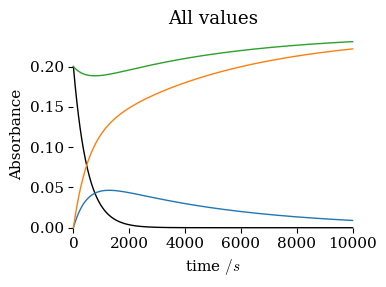

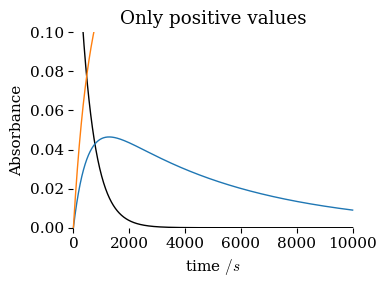

In [6]:
## Plot the function for Abst and its components

time = np.linspace(0,10000,100)  # 100 data points between 0 and 1E5 seconds
k1_value = 2E-3
k2_value = 2E-4
Abs0_value = 0.2
eA_value = 1       # use ratio so that eI/eA = 0.6 for example
eI_value = 0.3
eP_value = 0.6

# Create dictionaries contains substitution for each term
subs_dict_At = { 
                k1: k1_value, 
                Abs0: Abs0_value
                }
subs_dict_It = {
                k1: k1_value,
                k2: k2_value,
                Abs0: Abs0_value,
                eA: eA_value,
                eI: eI_value,
                }
subs_dict_Pt = {
                k1: k1_value,
                k2: k2_value,
                Abs0: Abs0_value,
                eA: eA_value,
                eP: eP_value,
                }
subs_dict_Abst = {
                  k1: k1_value,
                  k2: k2_value,
                  Abs0: Abs0_value,
                  eA: eA_value,
                  eI: eI_value,
                  eP: eP_value,
                  }

# plot each term using the values established above
t_range = [t,0,10000]
p1 = sym.plot(AbsA_expr.subs(subs_dict_At),t_range, show=False)
p2 = sym.plot(AbsI_expr.subs(subs_dict_It),t_range, show=False)
p3 = sym.plot(AbsP_expr.subs(subs_dict_Pt),t_range, show=False)
p4 = sym.plot(Abst_expr.subs(subs_dict_Abst),t_range, show=False)

p1.extend(p2)   # add all plots to p1
p1.extend(p3)
p1.extend(p4)

# Outout the combined plot

p1.size = [4,3]           # display settings for p1
p1.xlabel = r"time $/s$"
p1.ylabel = r"Absorbance"

plt.rcdefaults()
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

p1.title="All values"
p1.ylim = [None,None]
p1.save("p1.pdf")   # save and show p1
#p1.show()          # show p1

p1.title="Only positive values"
p1.ylim = [0,0.1]      
p1.save("p1b.pdf")
#p1.show()   


## Conclusions

We can see that the equation used in the paper gived nonsensical results with the absorbance due to the product, P, going into extremely negative values. This is impossible. When looking only in the positive region we see expected behaviour for the absorbance due to A and I.

This equation has an error. You will need to derive the correct equation and then modify this *Python* notebook to check it. It seems that the term for $Abs_P$ is the source of the error.

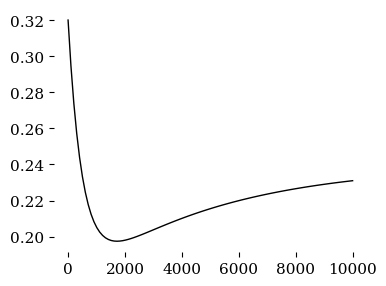

In [12]:
def absvstime():
    time = np.linspace(0,10000,100)  # 100 data points between 0 and 1E5 seconds
    k1_value = 2E-3
    k2_value = 2E-4
    Abs0_value = 0.2
    eA_value = 1       # use ratio so that eI/eA = 0.6 for example
    eI_value = 0.3
    eP_value = 0.6

    
    AbsA = Abs0_value * np.exp(-k1_value * time)
    AbsI = eI_value/eA_value*Abs0_value * k1_value/(k2_value-k1_value)*(np.exp(-k1_value * time)-np.exp(-k2_value * time))
    AbsP = eP_value/eA_value*Abs0_value * (2 - np.exp(-k1_value * time) - 1/(k2_value-k1_value)*(k1_value*np.exp(-k1_value * time)-k1_value*np.exp(-k2_value * time)))

    Total_Abs = AbsA + AbsI + AbsP

    return(Total_Abs)

import matplotlib.pyplot as plt

plt.plot(time, absvstime())